In [1]:
from pathlib import Path
home = str(Path.home())
import sys
sys.path.append('{}/prog/msm/lib'.format(home))

In [2]:
import numpy as np
from simlib import *
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.set_cmap('rainbow')

<Figure size 432x288 with 0 Axes>

In [3]:
import pyemma

In [35]:
gaussians = []
gaussians.append(gaussian(A=np.ones(1),
                          M=np.array([-2]),
                          S=np.ones(1)))
gaussians.append(gaussian(A=np.ones(1),
                          M=np.array([2]),
                          S=np.ones(1)))

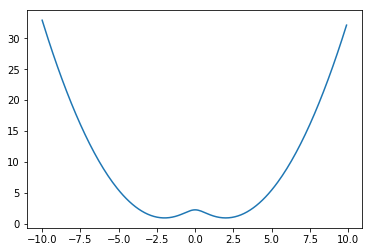

In [36]:
bins = np.arange(-10,10,0.1)
U = potential(gaussians)
y = [U.get_value([x]) for x in bins]
plt.plot(bins, y)

In [6]:
M = 1
parameters = {
    'name': 'equilibrium_test',
    'num_steps': 1000000,
    'num_dim': 1,
    'num_particles': M,
    'KBT': 1,
    'Ddt': 0.01,
    'x0': 0.0,
    'potential': U
}

In [37]:
Xs = simulate_equilibrium(parameters, 5, bound=0.99,
                          min_steps=300000,
                          max_steps=parameters['num_steps'])

360000 [178627 181374] 0.98


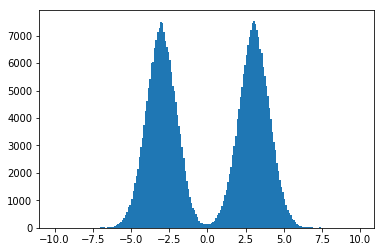

In [40]:
t = parameters['num_steps']
n = parameters['num_particles']
_ = plt.hist(Xs, bins)

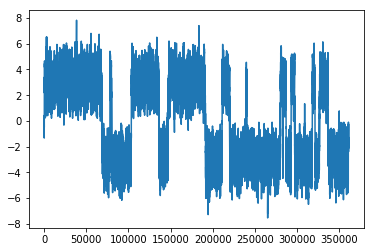

In [41]:
plt.plot(Xs)

In [42]:
cluster = pyemma.coordinates.cluster_kmeans(Xs, k=2, max_iter=50)
its = pyemma.msm.its(cluster.dtrajs, lags=np.arange(1,15001,1000), nits=3, errors='bayes')

10-05-19 17:01:06 pyemma.msm.estimators.implied_timescales.ImpliedTimescales[46] WARNING  Changed user setting nits to the number of available timescales nits=1


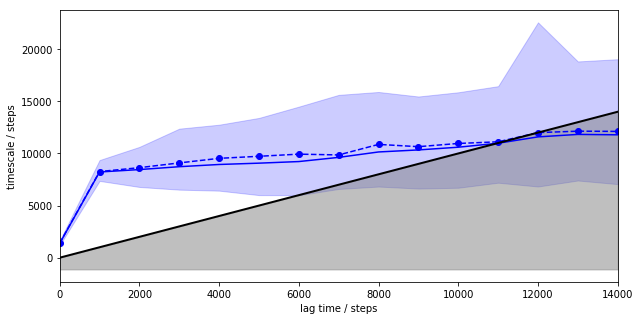

In [43]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
pyemma.plots.plot_implied_timescales(its, ylog=False, ax=axes)

(<Figure size 432x432 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb1c0de668>,
       dtype=object))

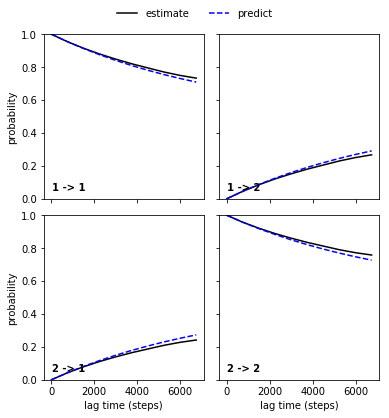

In [48]:
msm = pyemma.msm.estimate_markov_model(cluster.dtrajs, lag=750)
pyemma.plots.plot_cktest(msm.cktest(2))